In [1]:
import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from MNIST_Dataset_Loader.mnist_loader import MNIST
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
data = MNIST('./MNIST_Dataset_Loader/dataset/')

In [3]:
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

In [4]:
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)

In [5]:
X = train_img

In [6]:
y = train_labels

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)

In [9]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=10)
clf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=10)

In [10]:
confidence = clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
print('\nRFC Trained Classifier Confidence: ',confidence)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)


RFC Trained Classifier Confidence:  0.9671666666666666

Predicted Values:  [7 0 4 ... 9 6 8]

Accuracy of Classifier on Validation Image Data:  0.9671666666666666

Confusion Matrix: 
 [[611   0   1   0   0   0   3   0   5   0]
 [  0 660   3   2   0   0   0   1   0   2]
 [  2   2 549   5   2   1   1   4   2   2]
 [  0   0   4 622   0   8   1   5   1   1]
 [  1   0   0   0 546   0   1   3   1  13]
 [  2   1   2   6   0 513   4   0   2   3]
 [  1   2   0   0   1   4 555   0   0   0]
 [  0   1   6   0   3   0   0 577   4   8]
 [  0   3   5   7   2   7   5   0 581  11]
 [  2   2   2   6  10   3   0   3   2 589]]


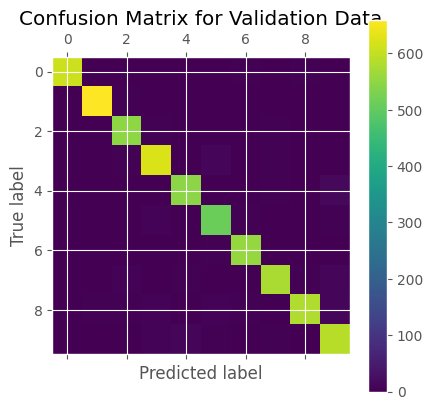

In [11]:
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [12]:
test_labels_pred = clf.predict(test_img)
acc = accuracy_score(test_labels,test_labels_pred)
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)
print('\nPredicted Labels for Test Images: ',test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ',acc)
print('\nConfusion Matrix for Test Data: \n',conf_mat_test)


Predicted Labels for Test Images:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Test Images:  0.9688

Confusion Matrix for Test Data: 
 [[ 969    0    2    0    0    1    3    1    4    0]
 [   0 1124    2    2    0    2    2    1    2    0]
 [   6    0  999    4    3    0    3    9    7    1]
 [   0    0   10  971    0    8    0    9    9    3]
 [   1    0    2    0  955    0    6    0    3   15]
 [   3    0    0   19    2  855    5    1    4    3]
 [   6    3    0    0    3    3  940    0    3    0]
 [   1    3   20    3    0    0    0  988    1   12]
 [   4    0    4    7    6    8    2    4  930    9]
 [   5    6    1   13   14    3    1    3    6  957]]


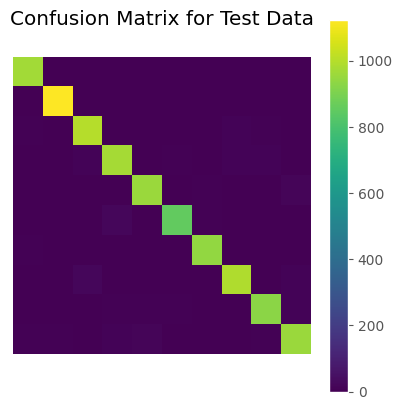

In [13]:
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

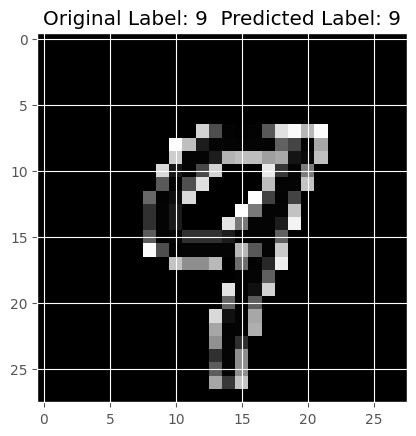

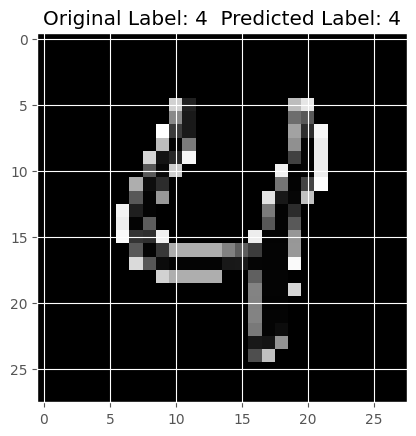

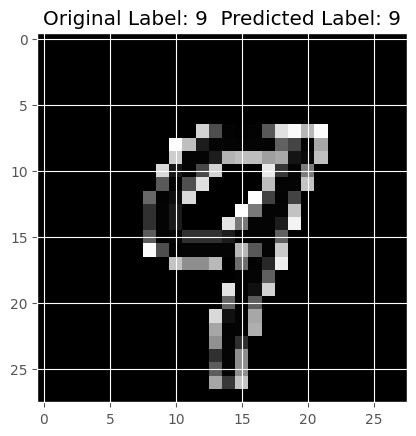

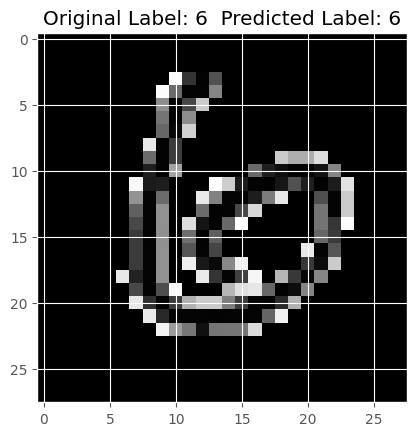

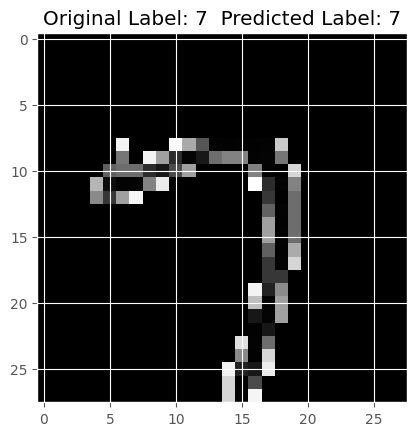

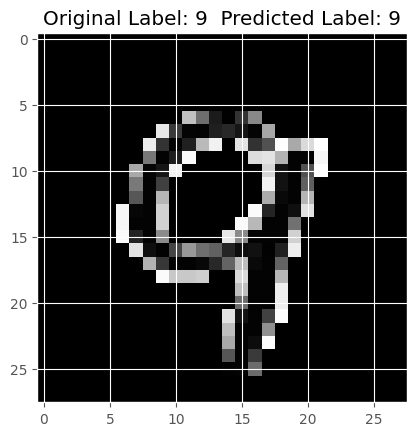

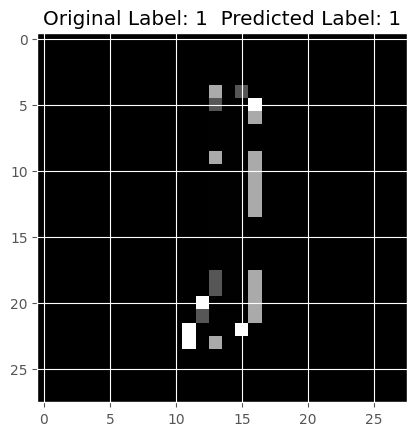

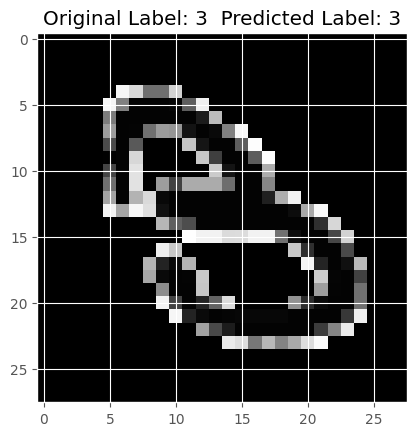

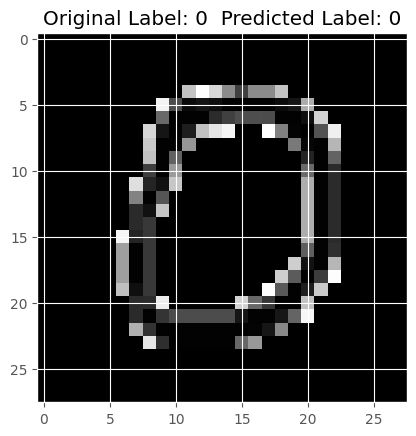

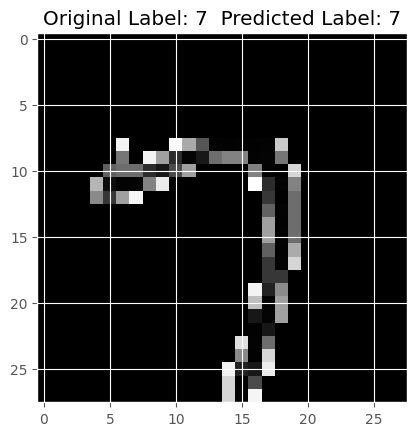

In [14]:
a = np.random.randint(1,30,10)
for i in a:
    two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()